# Essential Libraries

In [301]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

# Dataset Import

In [268]:
data_dir = '../../res/ready_to_use'

In [269]:
chicago = pd.read_csv(
    data_dir + '/Chicago.csv',
    encoding= 'unicode_escape')
chicago = chicago.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])
chicago_copy = chicago.copy()
chicago.head()



,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,NO CONTROLS,NO CONTROLS,CLEAR,['DARKNESS'],FIXED OBJECT,ALLEY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",1,NO INDICATION OF INJURY,2,Tuesday,5
1,20,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",1,NO INDICATION OF INJURY,1,Tuesday,5
2,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,1,N,W,N,"('N',)",2,NO INDICATION OF INJURY,0,Tuesday,5
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",SIDESWIPE SAME DIRECTION,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",2,NO INDICATION OF INJURY,22,Monday,5
4,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",ANGLE,FOUR WAY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,1,N,N,N,"('N',)",2,NO INDICATION OF INJURY,21,Monday,5


# Exploratory Data Analysis (EDA)

Các hàm vẽ đồ thị:

In [270]:
def histogram(df, colname, num_bins=20, figsize=(10, 5)):
  _, ax = plt.subplots(figsize=figsize)
  x_locator = ticker.AutoLocator()
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  ax.xaxis.set_major_locator(x_locator)
  plt.tight_layout()
  plt.show()

In [271]:
def categorical_histogram(df, colname, figsize=(30, 10), mpl_palette_name='Dark2', direction='h', top_values = None):
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  if top_values != None:
    bars = df[colname].value_counts()[:top_values]
  if direction == 'h':
    plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  else:
    plt.bar(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.show()

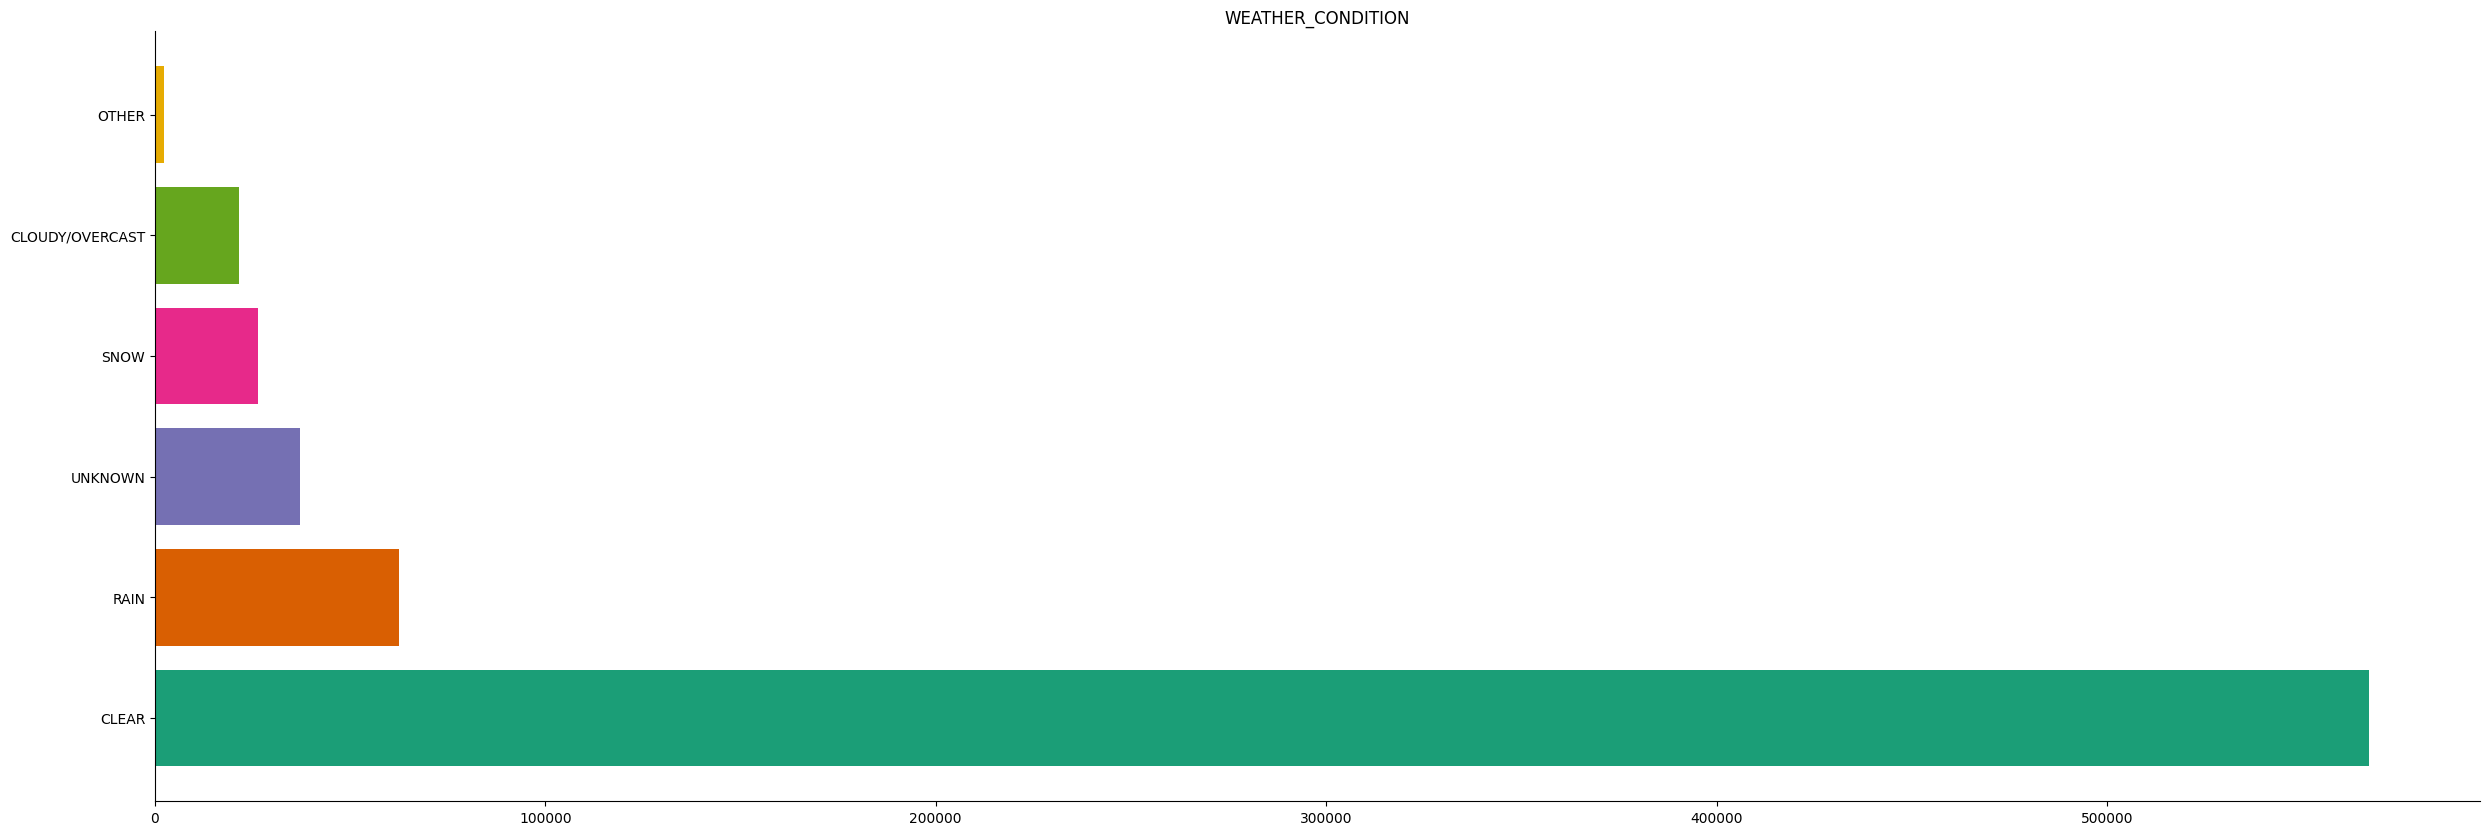

In [272]:
categorical_histogram(chicago, *['WEATHER_CONDITION'], top_values=6)

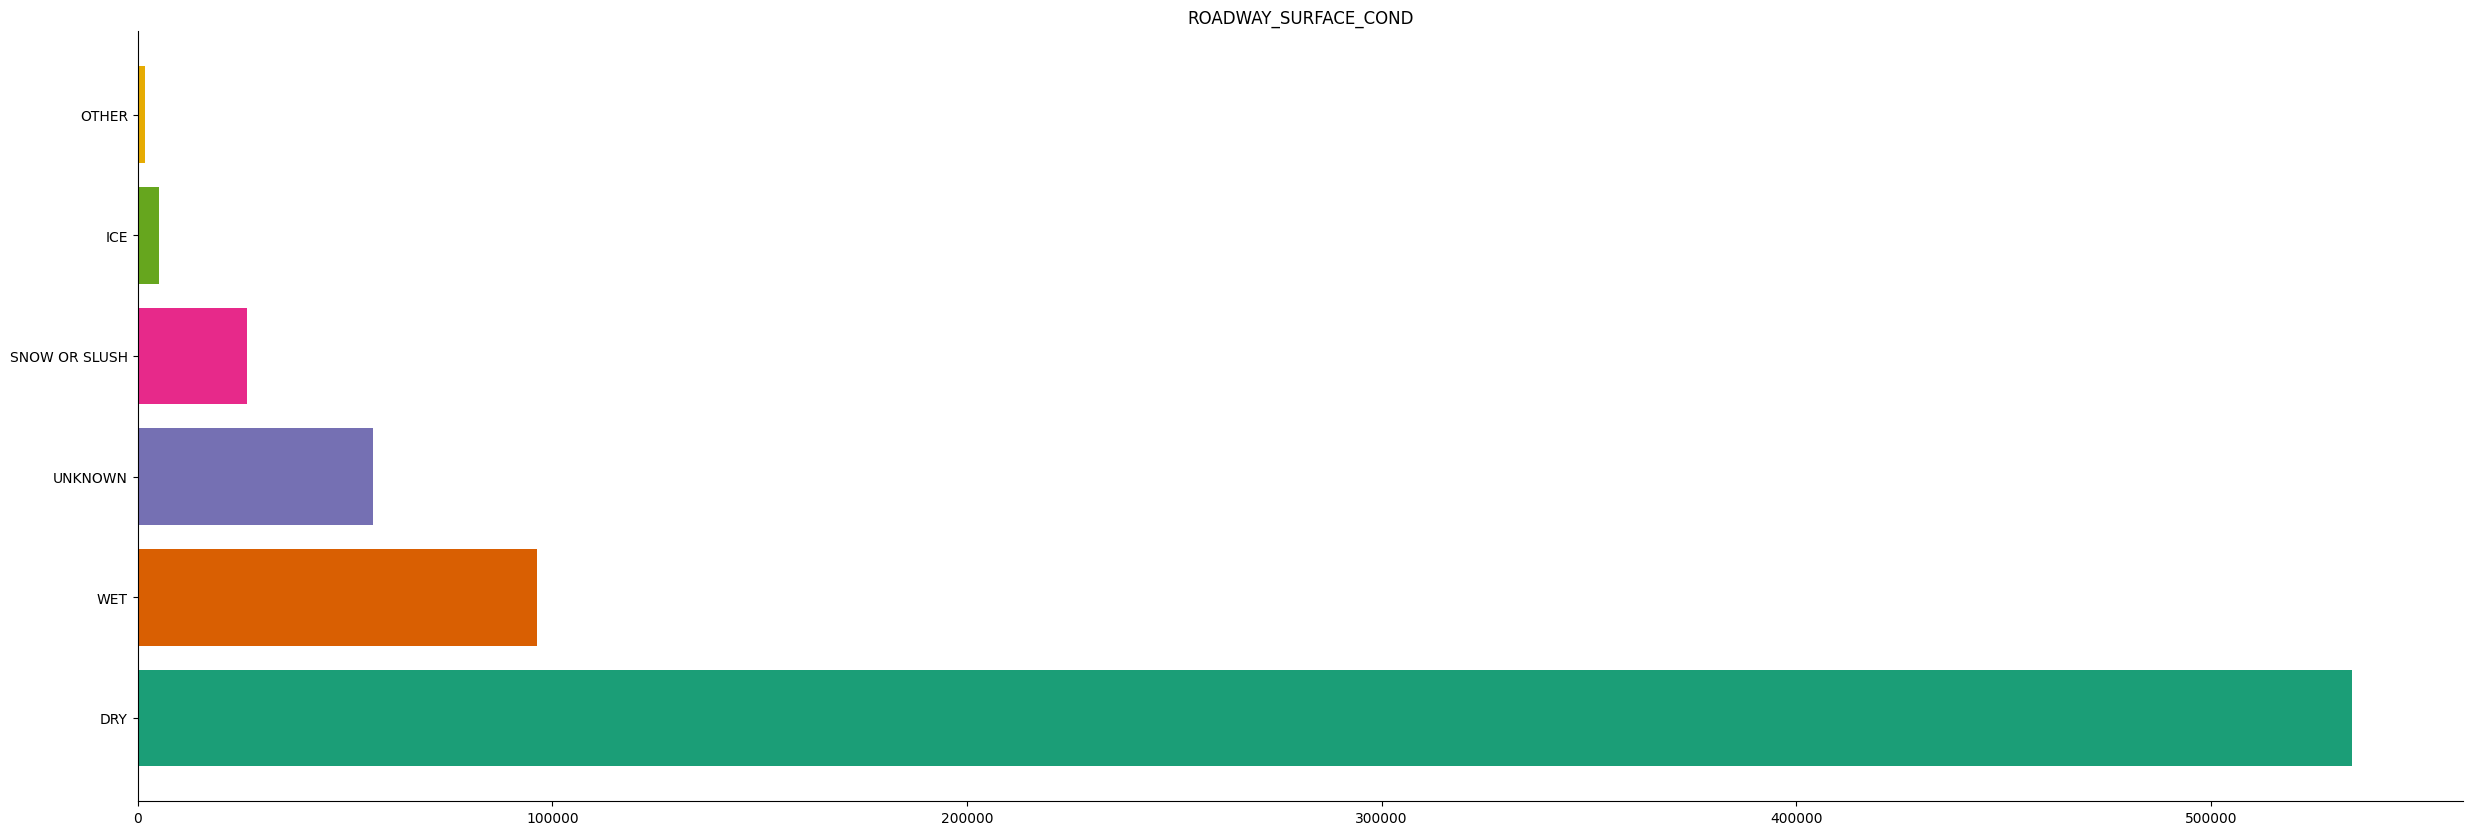

In [273]:
categorical_histogram(chicago, *['ROADWAY_SURFACE_COND'], top_values=6)

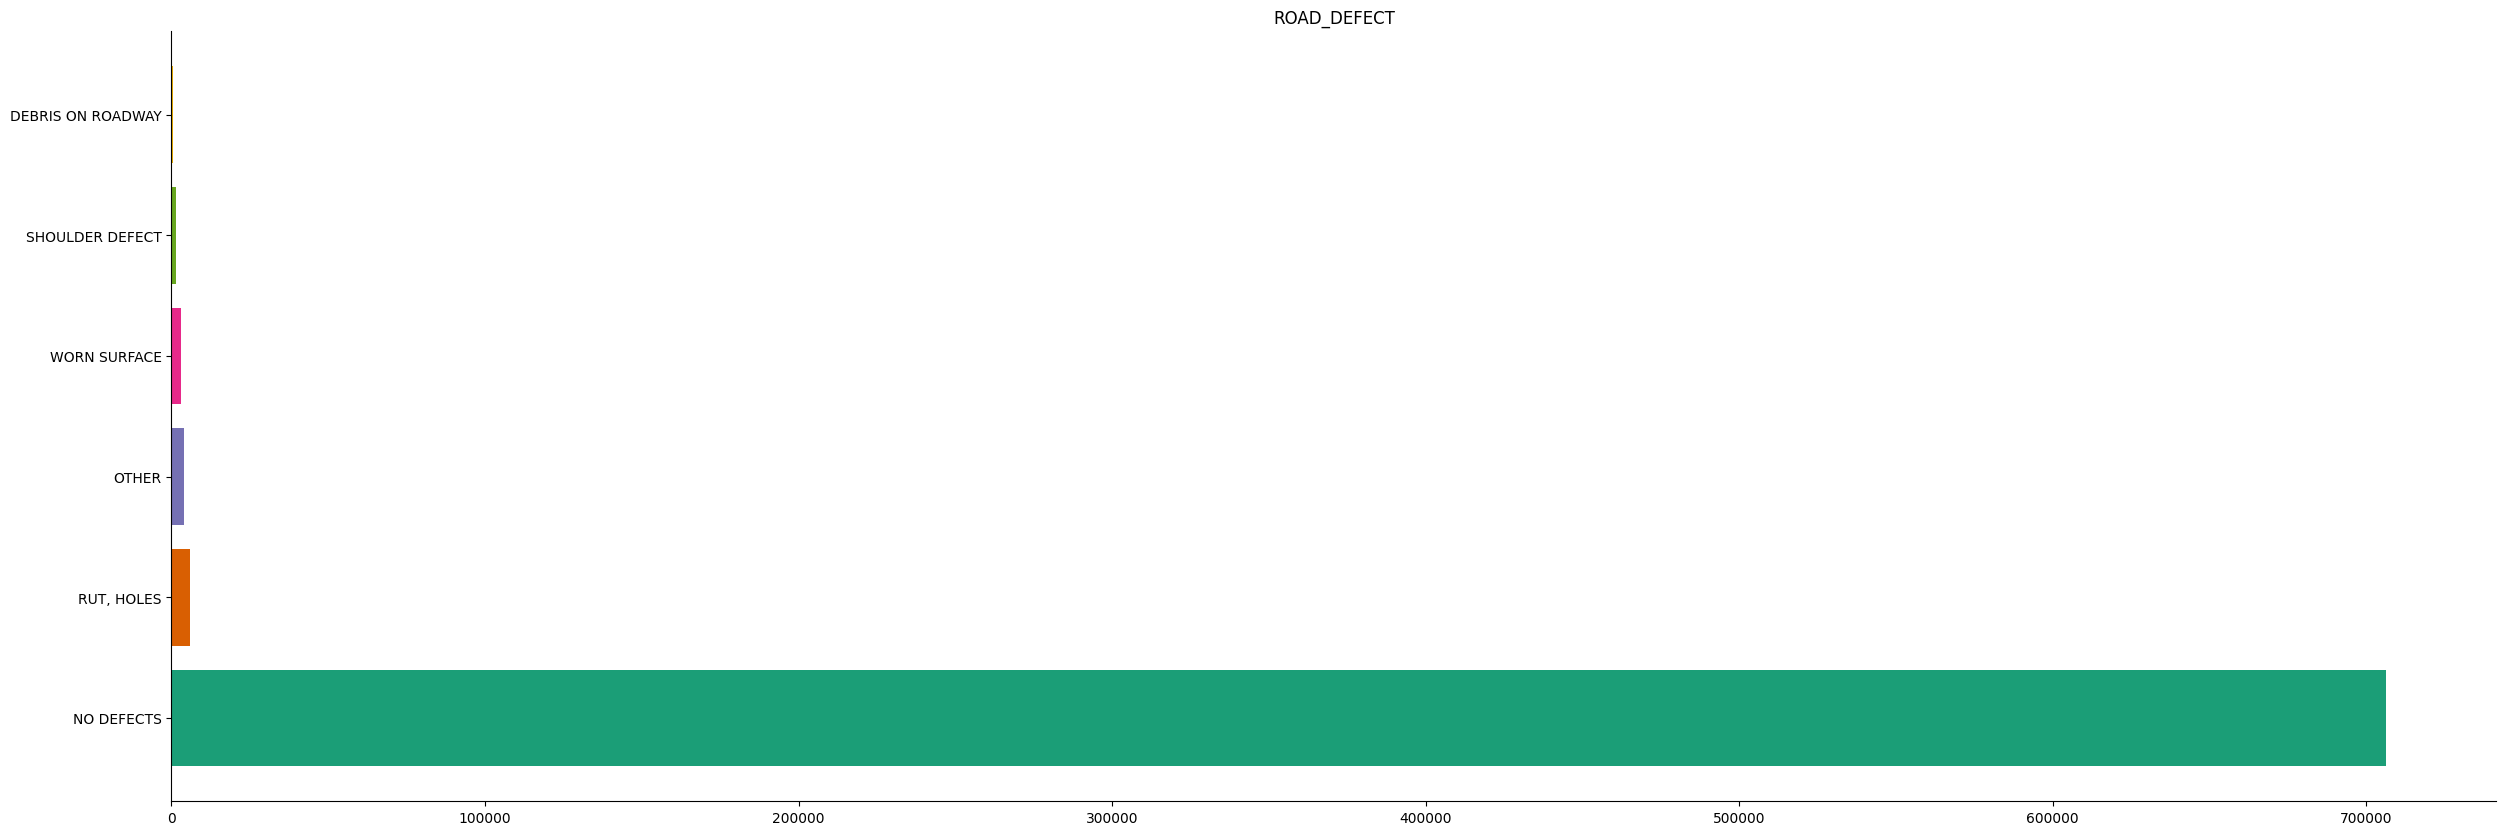

In [274]:
categorical_histogram(chicago, *['ROAD_DEFECT'])

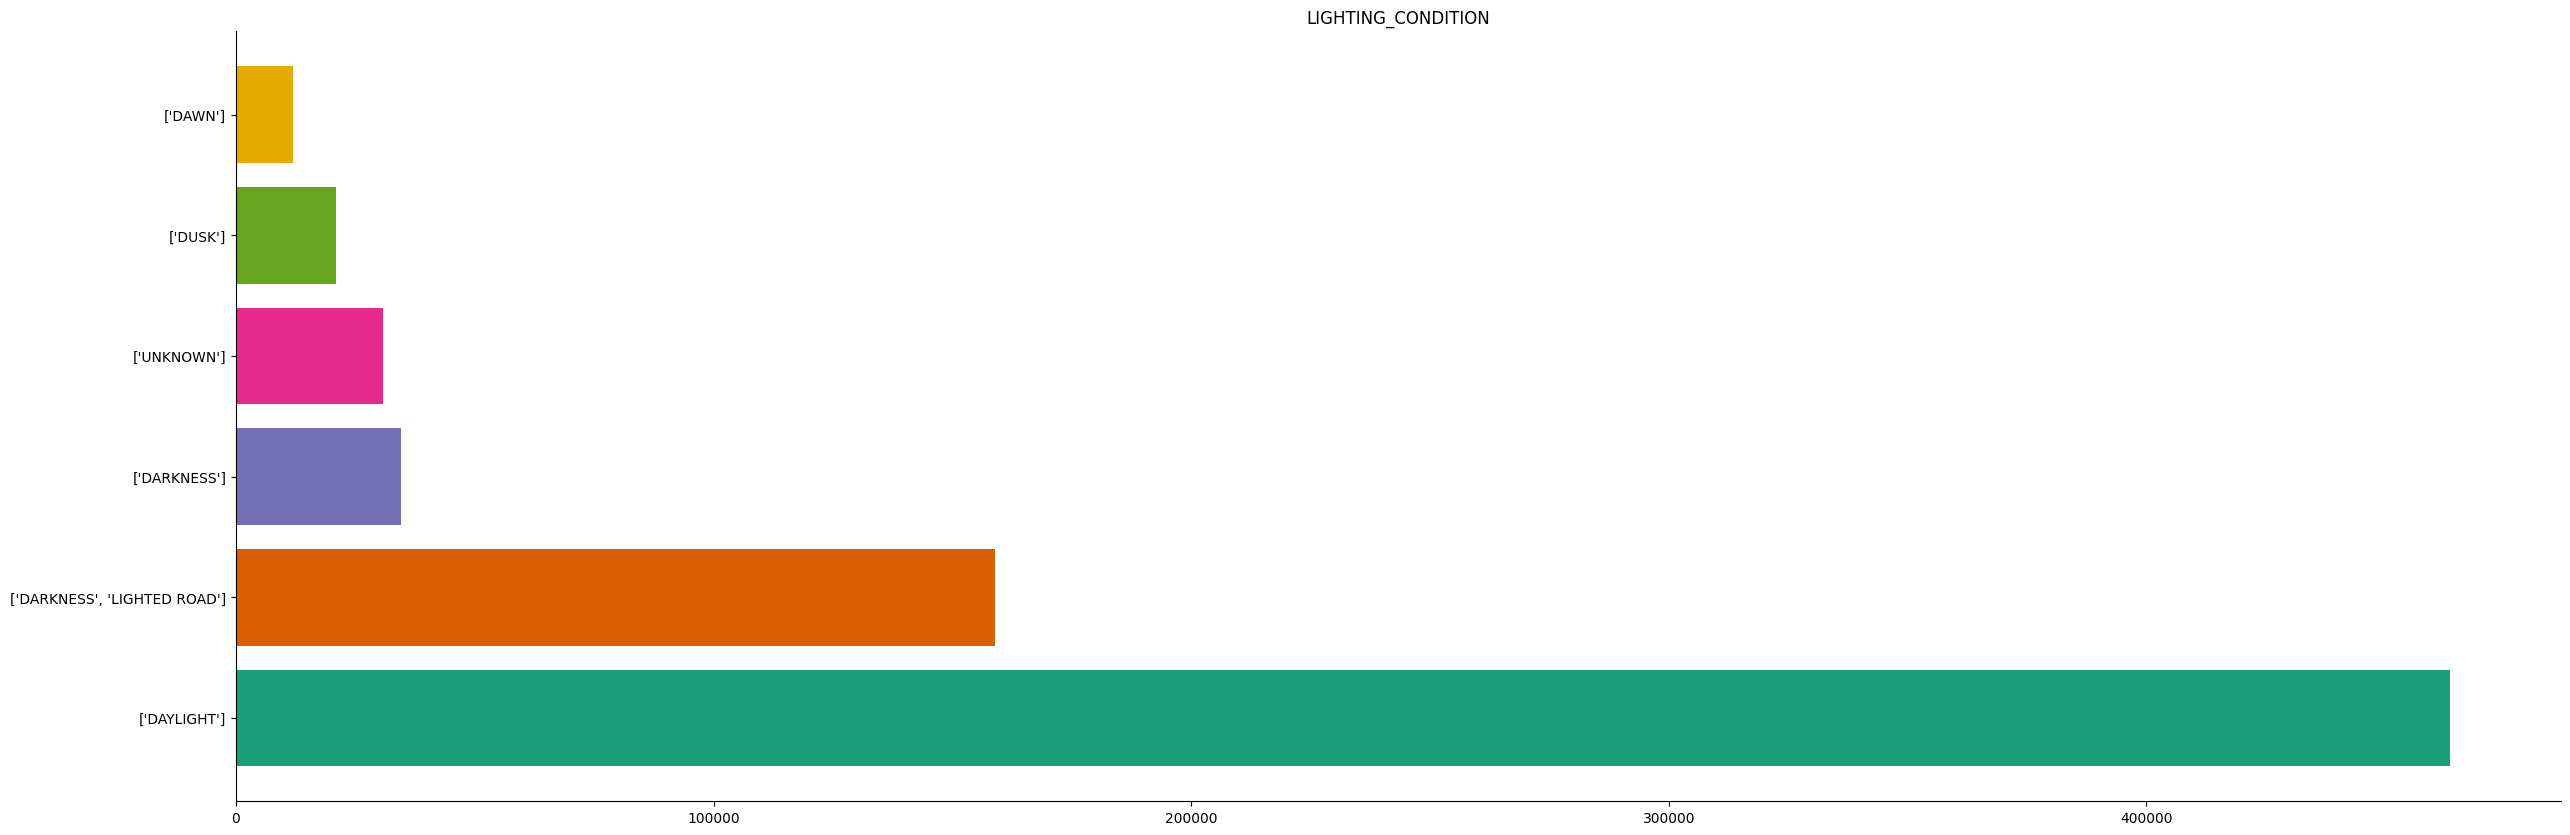

In [275]:
categorical_histogram(chicago, *['LIGHTING_CONDITION'])

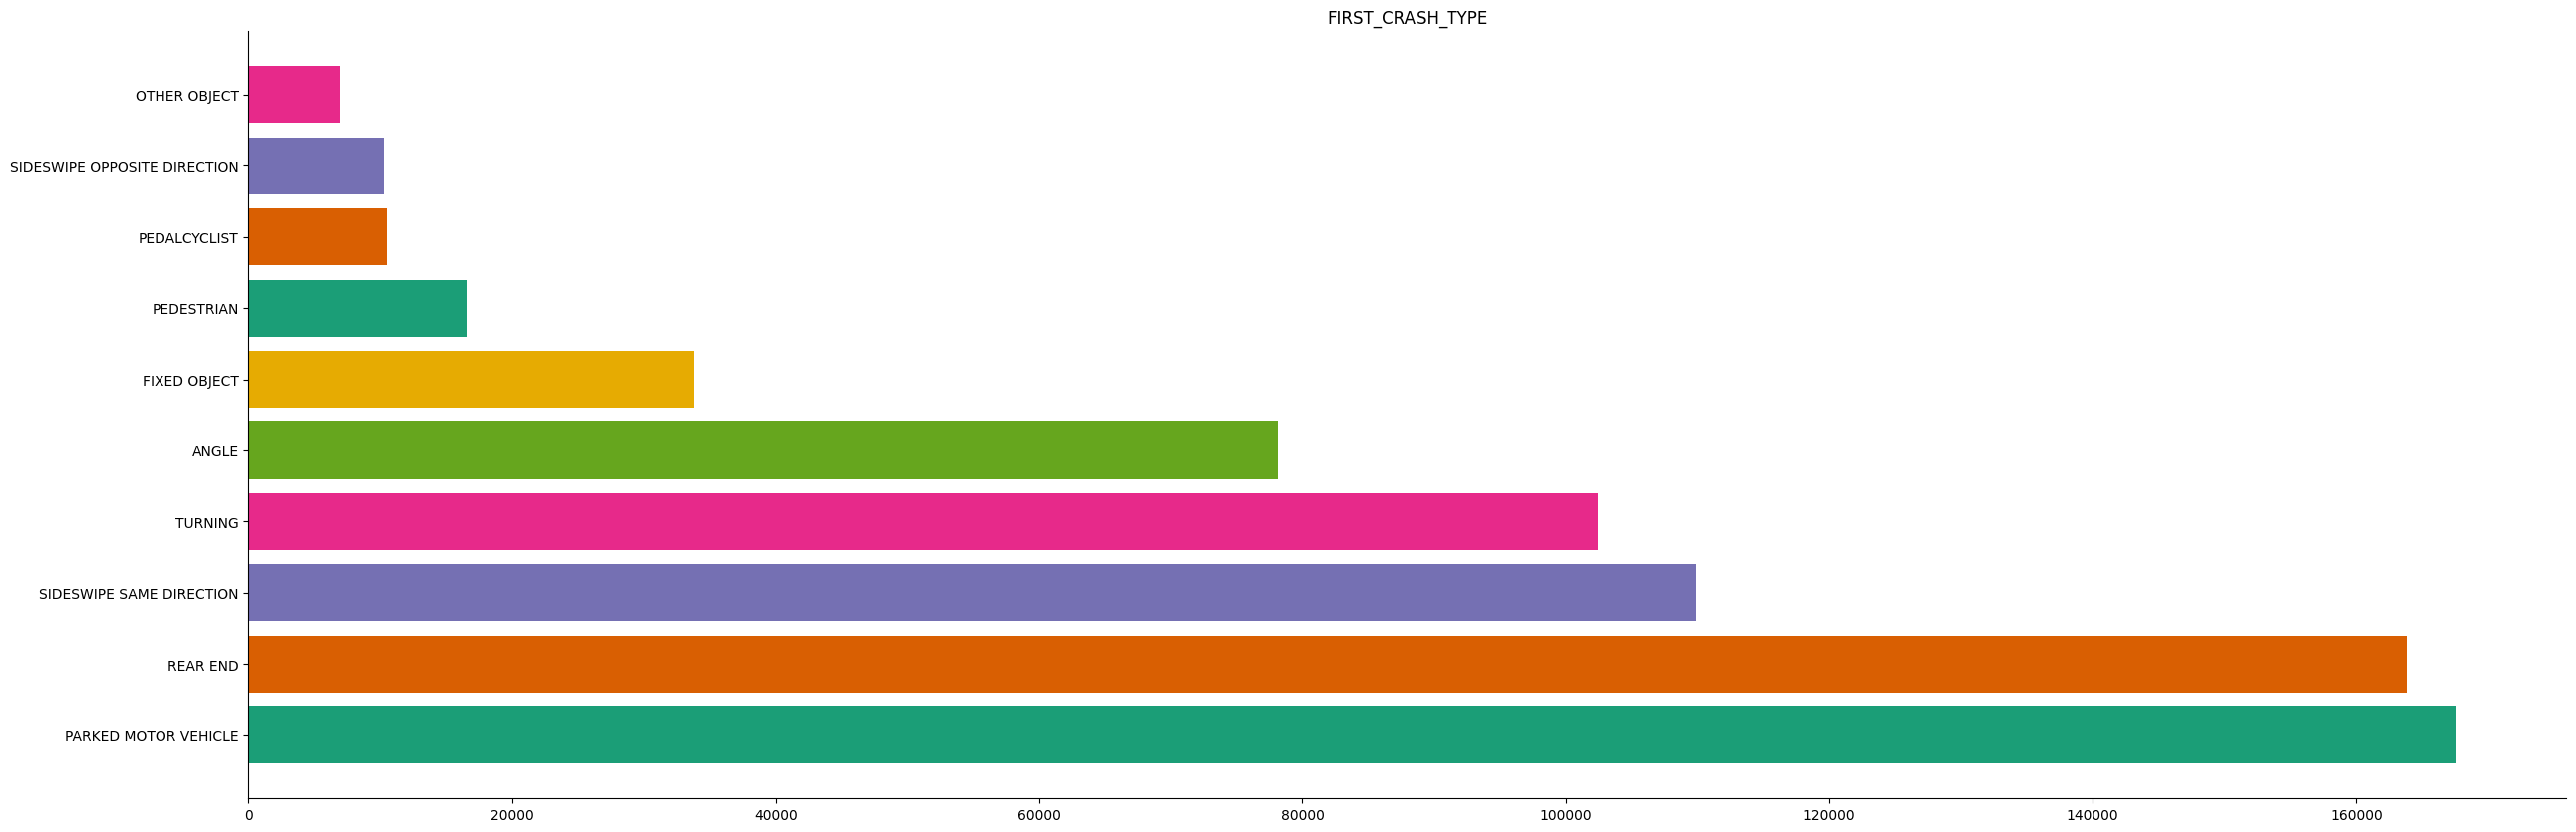

In [276]:
categorical_histogram(chicago, *['FIRST_CRASH_TYPE'], top_values = 10)

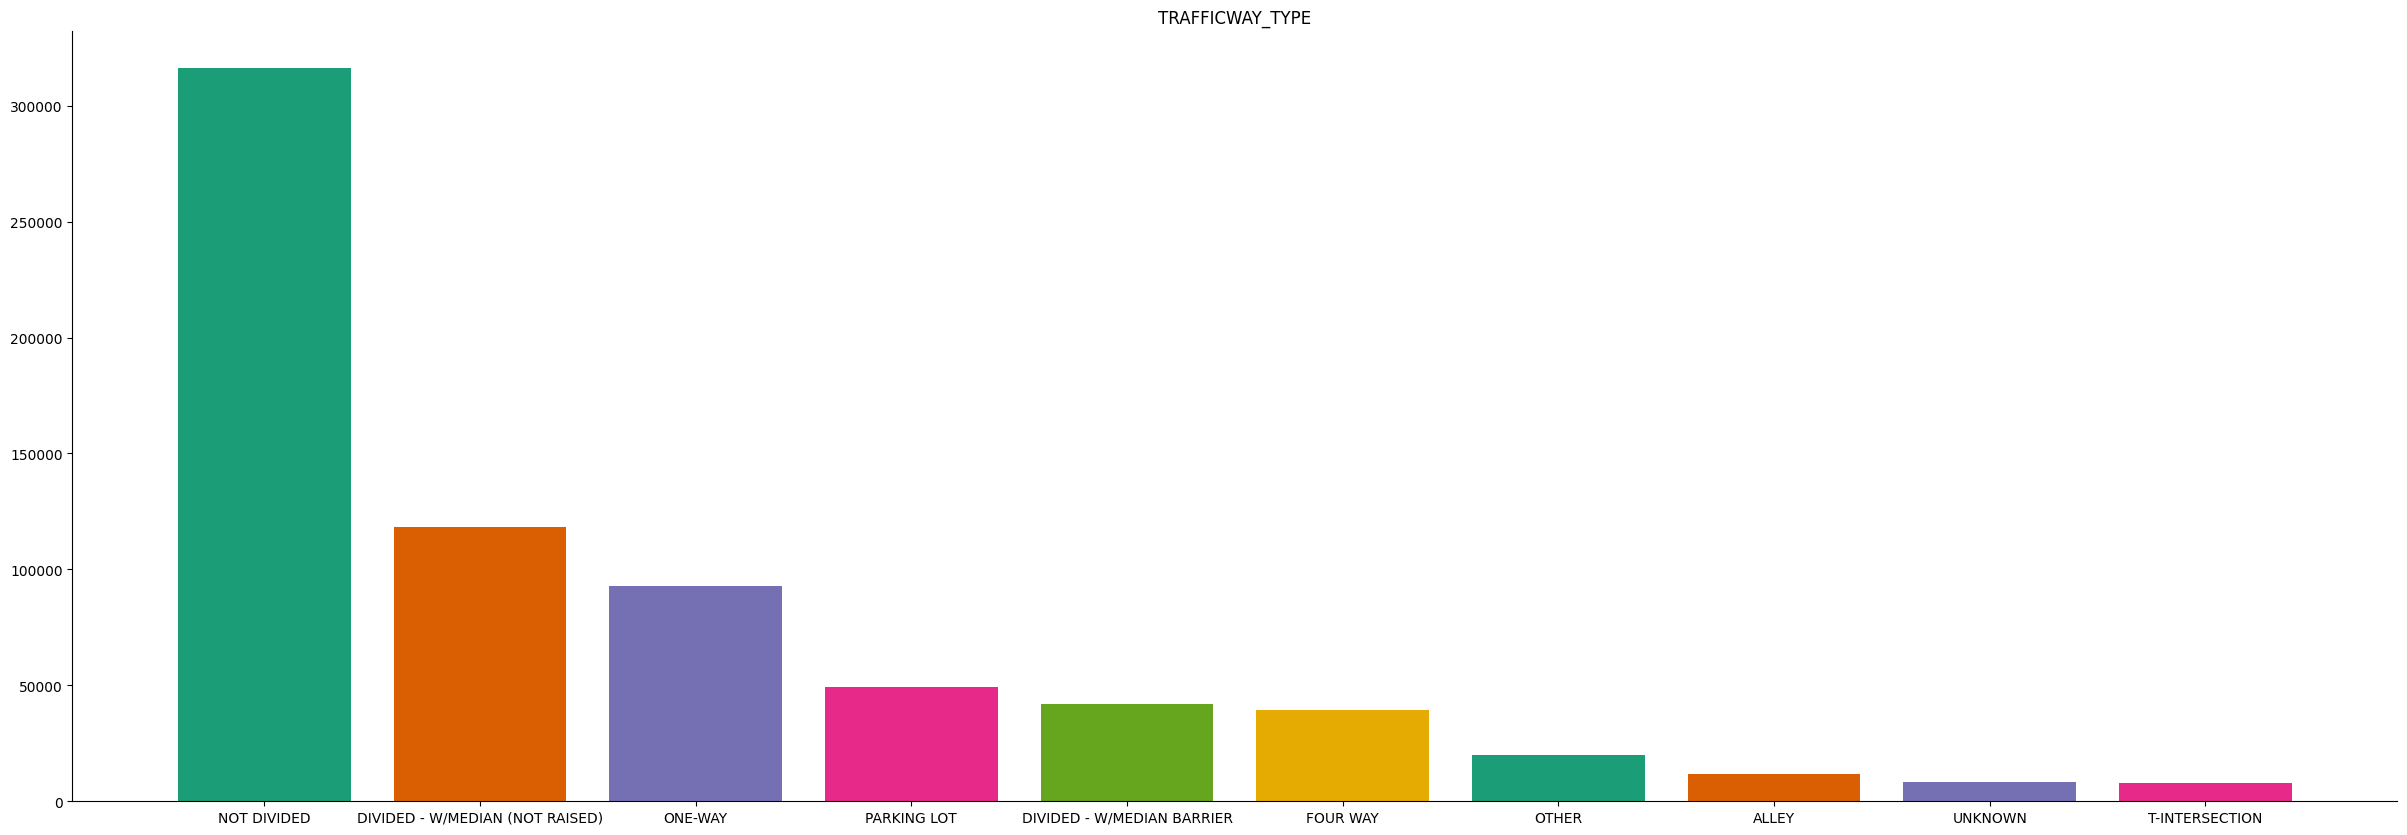

In [277]:
categorical_histogram(chicago, *['TRAFFICWAY_TYPE'], top_values = 10, direction  ='v')

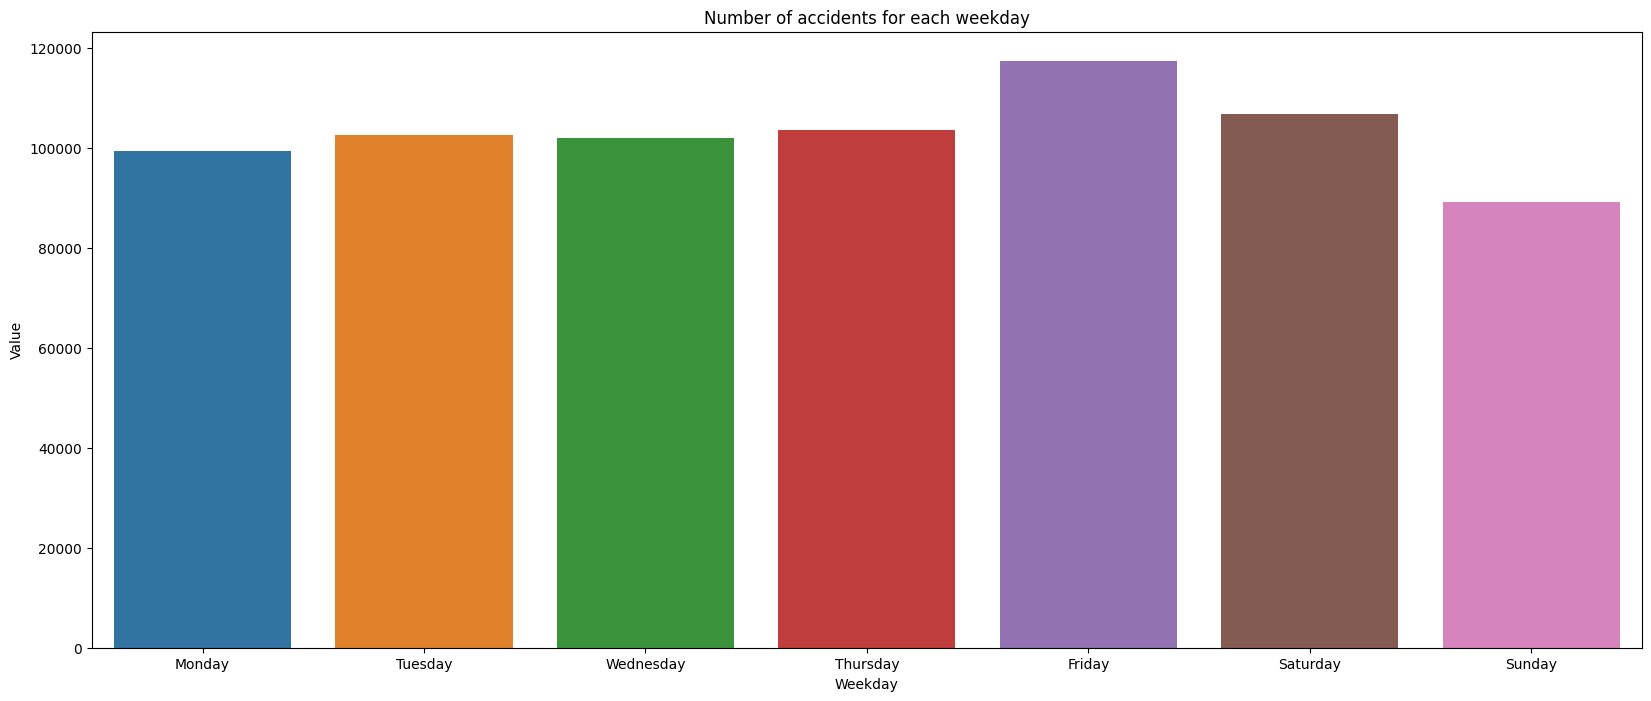

In [278]:
counts = chicago['CRASH_DAY_OF_WEEK'].value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x = counts.index, y = counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

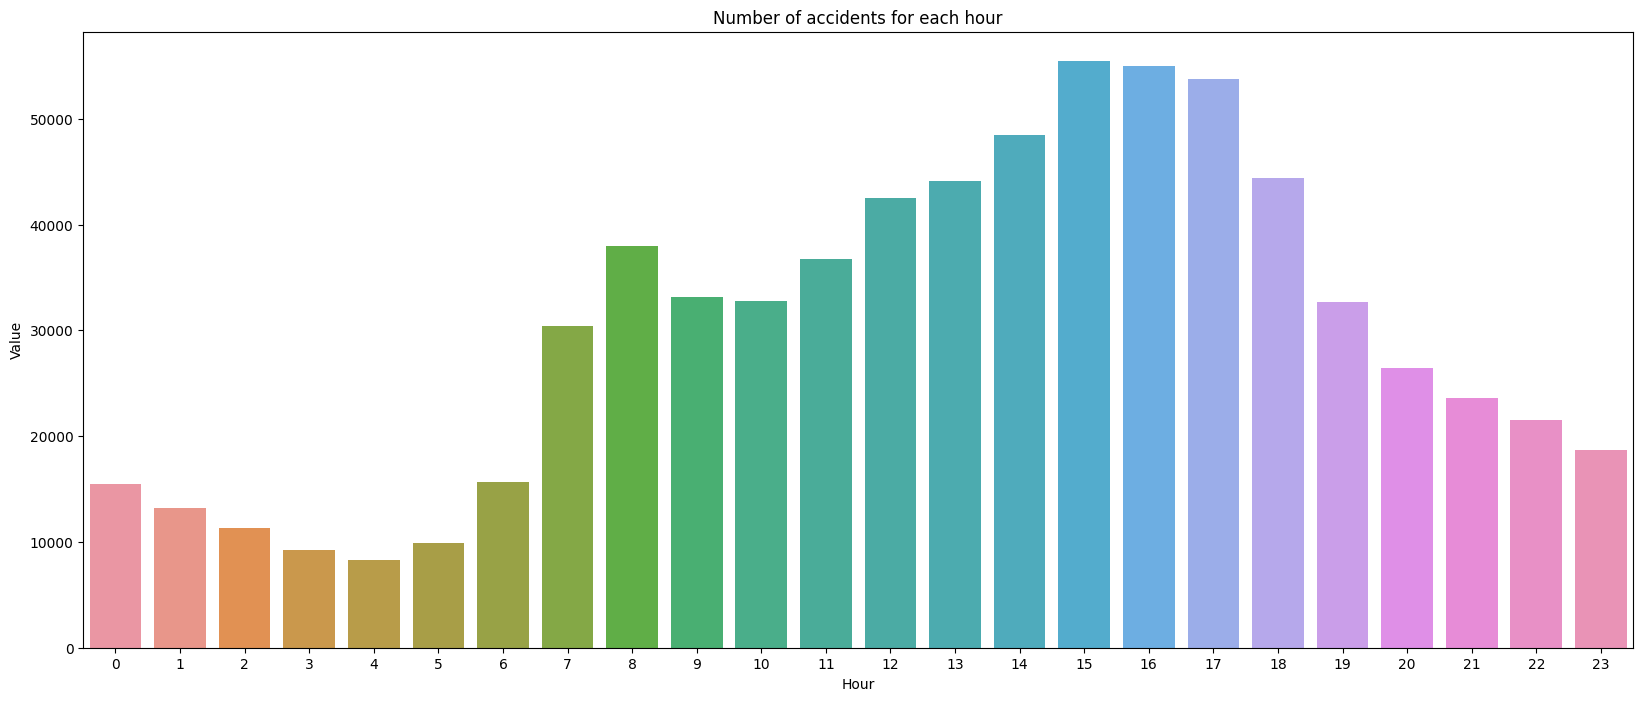

In [279]:
counts = chicago['CRASH_HOUR'].value_counts()
hours = range(24)

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each hour")
sns.barplot(x = counts.index, y = counts.values, order=hours)
plt.xlabel("Hour")
plt.ylabel("Value")
plt.show()

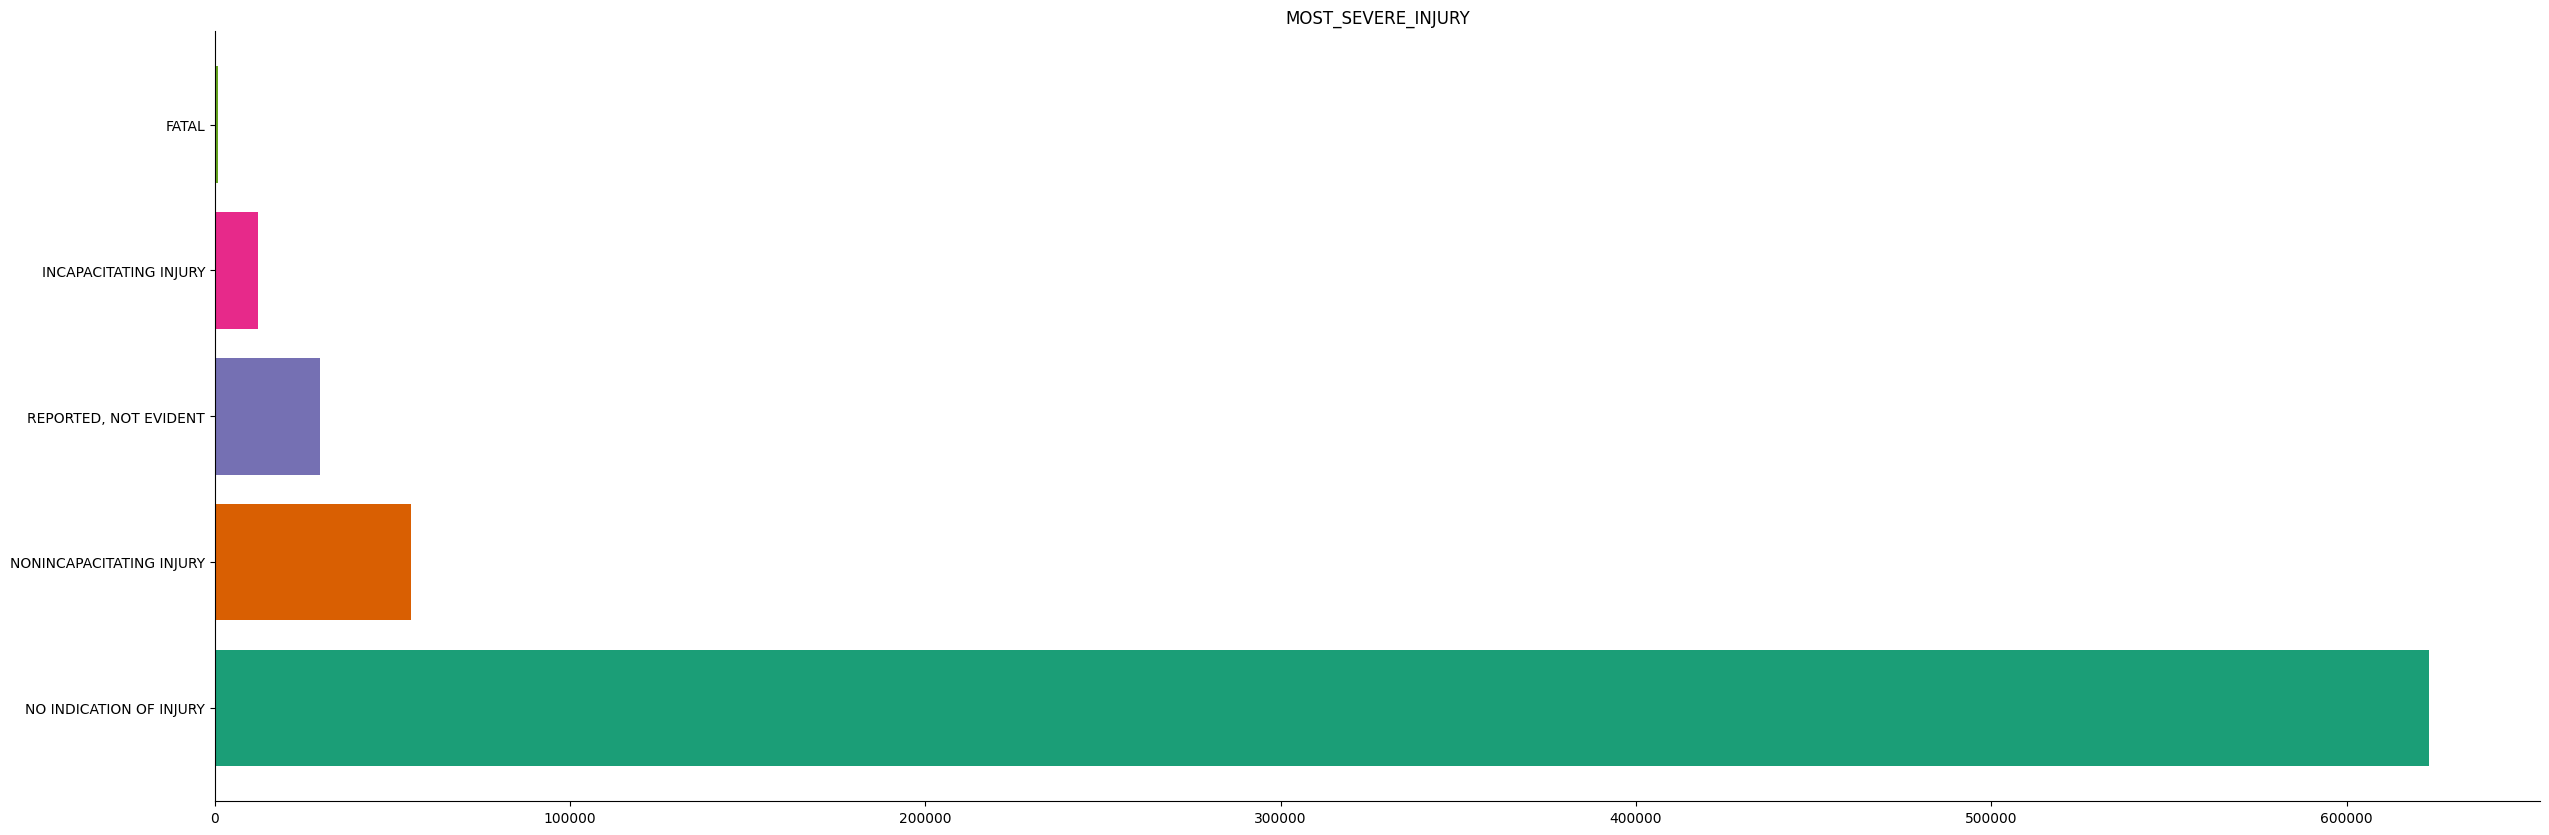

In [280]:
categorical_histogram(chicago, *['MOST_SEVERE_INJURY'])

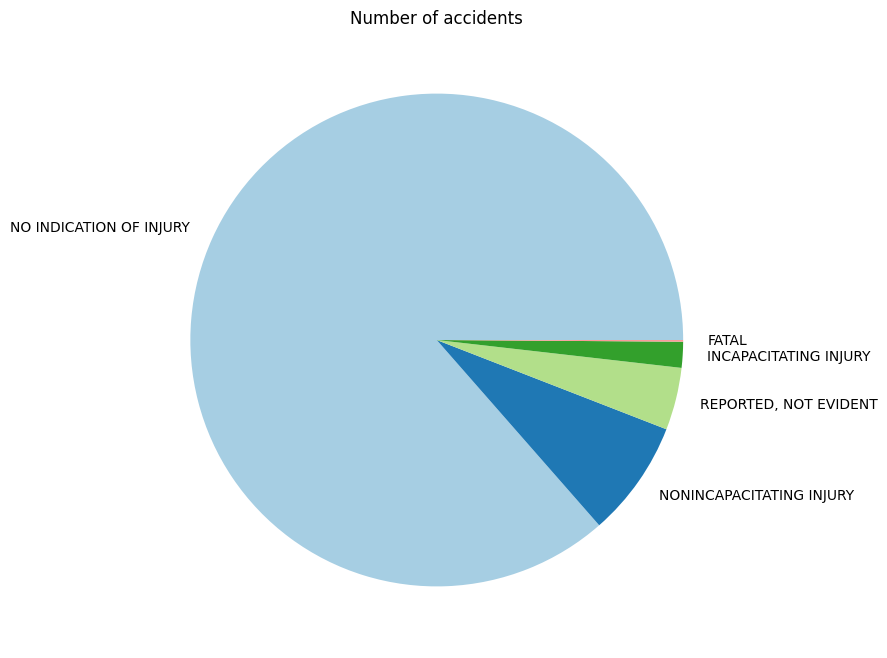

In [281]:
counts = chicago['MOST_SEVERE_INJURY'].value_counts()

plt.figure(figsize=(20, 8))
plt.title("Number of accidents")
plt.pie(x=counts.values, labels=counts.index, colors=sns.color_palette("Paired", 8))
plt.show()

# Data Preprocessing

In [282]:
chicago_preprocessing = chicago.copy()

In [283]:
label_encoder = {}
for column in chicago.columns:
    label_encoder[column] = LabelEncoder()
    # label_encoder[column].fit(chicago[column])
    # print(chicago[column])
    chicago_preprocessing[column] = label_encoder[column].fit_transform(chicago[column])
chicago_preprocessing.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,14,4,3,2,1,2,0,5,0,1,0,0,3,0,0,0,2,2,5,4
1,16,4,3,2,0,2,8,5,0,1,0,0,3,0,0,0,2,1,5,4
2,23,4,3,2,0,2,3,5,0,1,1,0,3,0,0,1,2,0,5,4
3,23,4,3,2,0,15,8,5,0,1,0,0,3,0,0,1,2,22,1,4
4,28,15,1,2,0,0,6,5,0,1,1,0,1,0,0,1,2,21,1,4


In [284]:
x_chicago = chicago_preprocessing.drop(columns=['MOST_SEVERE_INJURY'])
x_chicago.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,14,4,3,2,1,2,0,5,0,1,0,0,3,0,0,0,2,5,4
1,16,4,3,2,0,2,8,5,0,1,0,0,3,0,0,0,1,5,4
2,23,4,3,2,0,2,3,5,0,1,1,0,3,0,0,1,0,5,4
3,23,4,3,2,0,15,8,5,0,1,0,0,3,0,0,1,22,1,4
4,28,15,1,2,0,0,6,5,0,1,1,0,1,0,0,1,21,1,4


In [285]:
y_chicago = chicago_preprocessing[['MOST_SEVERE_INJURY']]
y_chicago.head()

,MOST_SEVERE_INJURY
0,2
1,2
2,2
3,2
4,2


In [286]:
print(x_chicago.shape)
print(y_chicago.shape)

(720891, 19)
(720891, 1)


# Correlation Matrix (Ma trận tương quan)
Các feature được visualize trong một ma trận ở dạng heatmap để xác định tương quan giữa các feature:

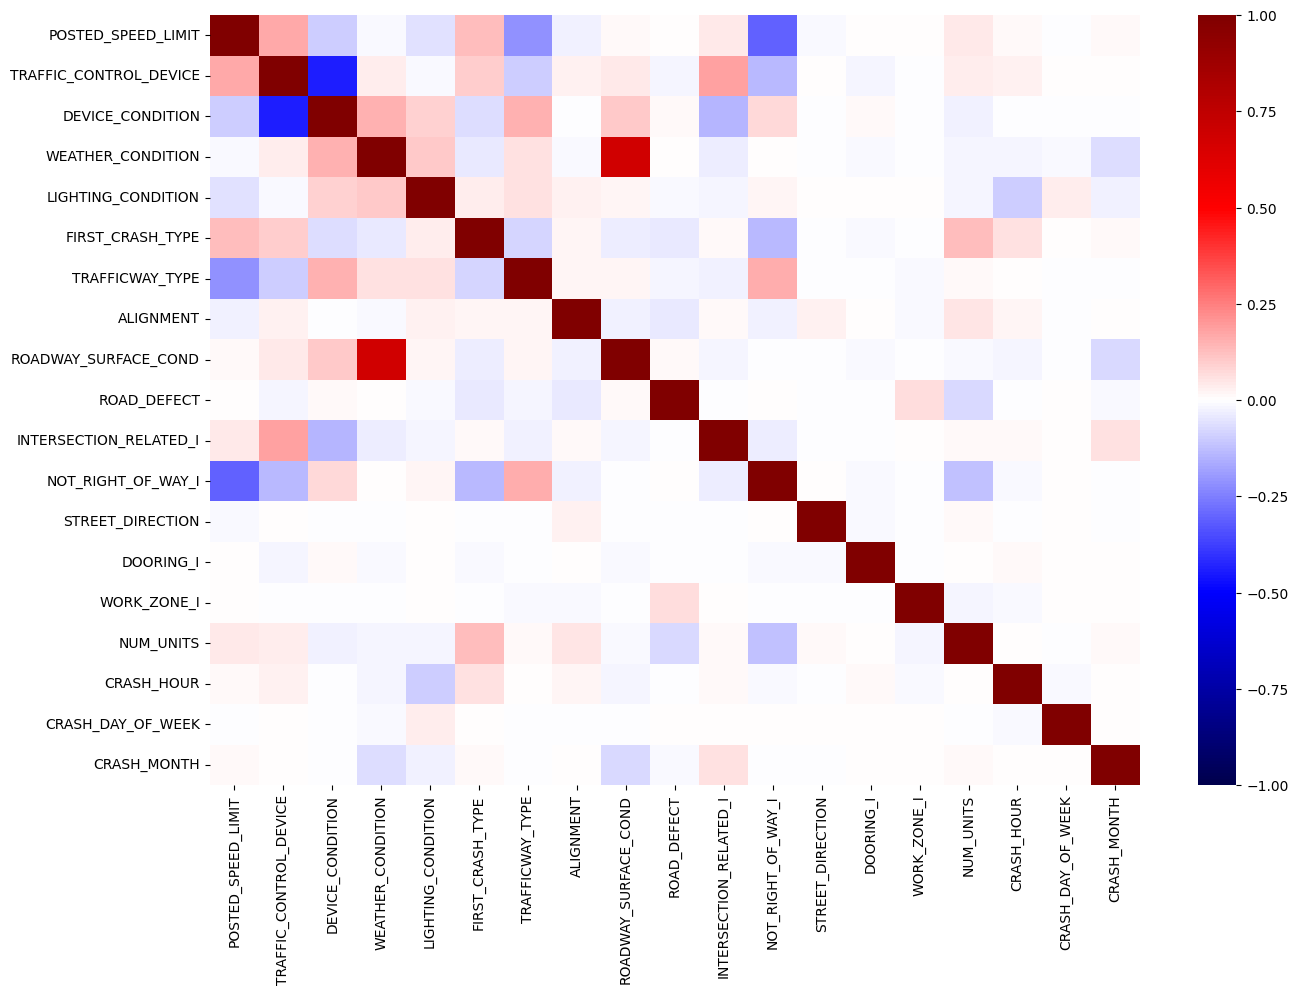

In [287]:
corr_matrix = x_chicago.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

Hầu như các feature ít có tương quan thấp.
Cao nhất (màu đỏ) là 2 feature điều kiện bề mặt đường & điều kiện thời tiết. Theo các field ở trên có thể thấy thời tiết thường ảnh hưởng đến trực tiếp đến bề mặt đường.

# Model

## Split data

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x_chicago.copy(), y_chicago.copy(), test_size=0.2, random_state=42, stratify=y_chicago.copy())
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (576712, 19), y_train shape: (576712, 1)
x_test shape: (144179, 19), y_test shape: (144179, 1)


## Standardization

In [289]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Apply Decision Tree Model

In [290]:
kernel = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
model = GridSearchCV(kernel, parameters, cv=5, verbose=4, n_jobs=-1)
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

In [291]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

## Model Score

In [292]:
print("Best parameters scores:")
print(model.best_params_)
print(f'Train score: {model.score(x_train, y_train)}')
print(f'Validation score: {model.score(x_test, y_test)}')

Best parameters scores:
{'criterion': 'entropy', 'max_depth': 5}
Train score: 0.8766333976057373
Validation score: 0.8757932847363347


In [293]:
print("Default scores:")
kernel.fit(x_train, y_train)
print("Train score:", kernel.score(x_train, y_train))
print("Validation score:", kernel.score(x_test, y_test))

Default scores:


Train score: 0.9862912510923997
Validation score: 0.783720236650275


In [294]:
pd.DataFrame(model.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,5.286216,0.341788,0.071624,0.013537,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.877218,0.877123,0.875943,0.876264,0.876610,0.876632,0.000489,1
0,7.463701,1.010129,0.105640,0.032931,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.877132,0.877114,0.875943,0.876264,0.876584,0.876607,0.000467,2
5,11.179472,0.399293,0.111102,0.029385,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.876620,0.876325,0.875163,0.875570,0.875085,0.875753,0.000618,3
1,11.884686,0.594000,0.142394,0.036629,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.876126,0.876247,0.875059,0.875267,0.875093,0.875558,0.000519,4
2,16.475208,0.679707,0.098849,0.021298,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.870309,0.869615,0.868287,0.868920,0.868244,0.869075,0.000793,5
6,15.138479,0.915116,0.132067,0.059909,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.868514,0.868609,0.867542,0.867568,0.867533,0.867953,0.000498,6
3,18.366727,1.045217,0.282088,0.099423,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.806846,0.803759,0.803844,0.806775,0.803697,0.804984,0.001492,7
7,18.360360,2.165383,0.161135,0.009526,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.799728,0.797890,0.796822,0.800168,0.799648,0.798851,0.001279,8


## Result

In [295]:
y_pred = kernel.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred, average="macro")}')
print(f'--------------------- TRAIN ---------------------')
print(classification_report(y_train, kernel.predict(x_train)))
print(f'--------------------- TEST ---------------------')
print(classification_report(y_test, y_pred))

Accuracy: 0.783720236650275
F1: 0.2526036047217425
--------------------- TRAIN ---------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       631
           1       0.95      0.97      0.96      9794
           2       0.99      1.00      0.99    498604
           3       0.99      0.91      0.95     44077
           4       1.00      0.86      0.92     23606

    accuracy                           0.99    576712
   macro avg       0.98      0.95      0.96    576712
weighted avg       0.99      0.99      0.99    576712

--------------------- TEST ---------------------
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       158
           1       0.07      0.09      0.08      2449
           2       0.90      0.88      0.89    124652
           3       0.21      0.22      0.21     11019
           4       0.07      0.08      0.07      5901

    accuracy                       

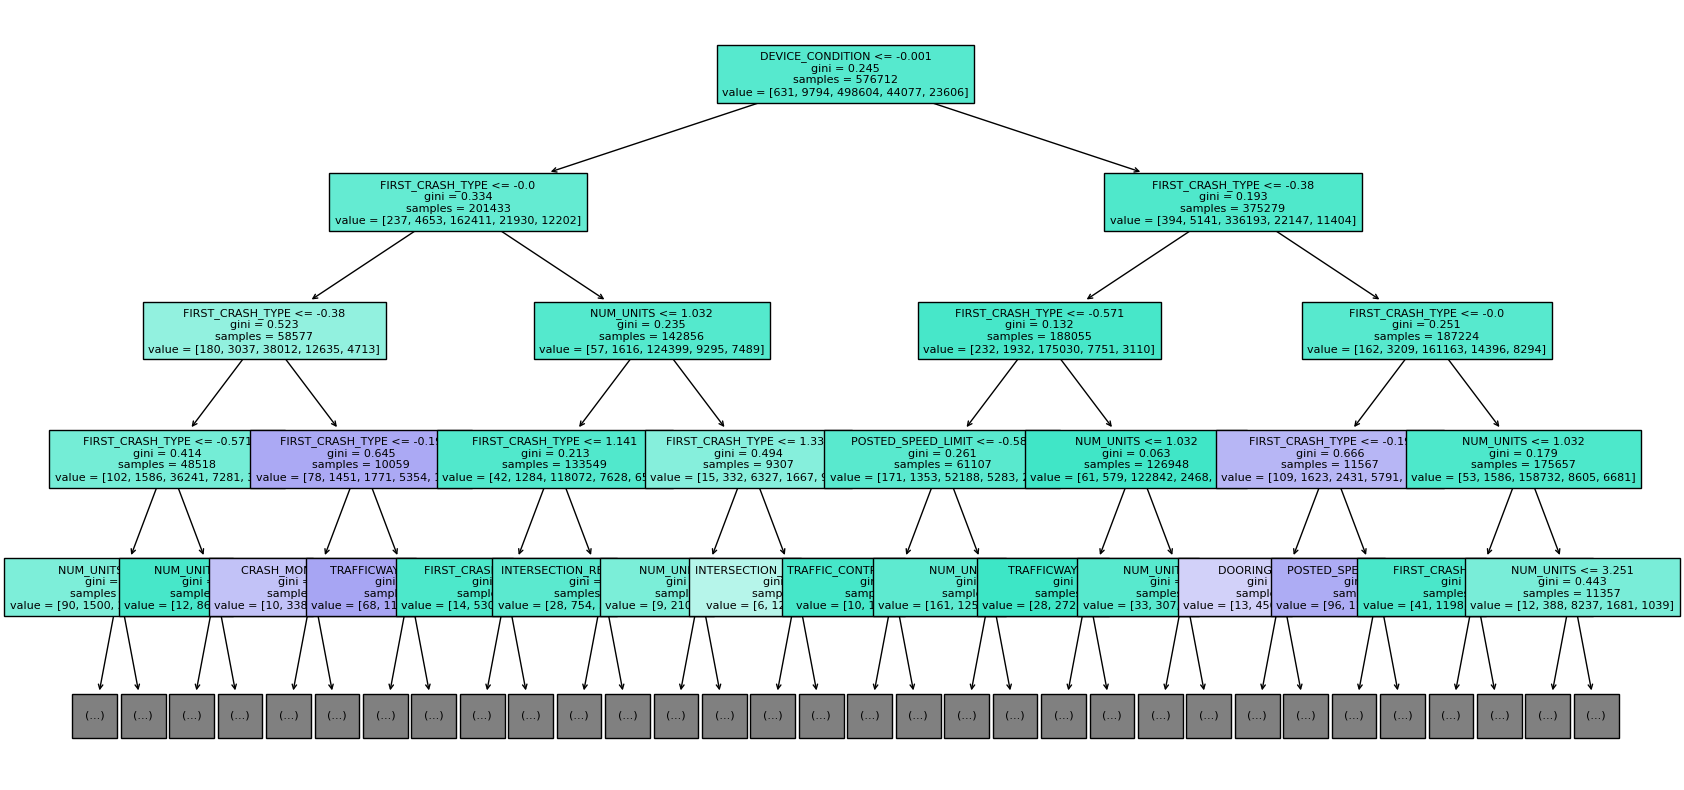

In [296]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(kernel, max_depth=4, fontsize=8, feature_names=x_chicago.columns.to_list(), class_names = None, filled=True)
plt.show()

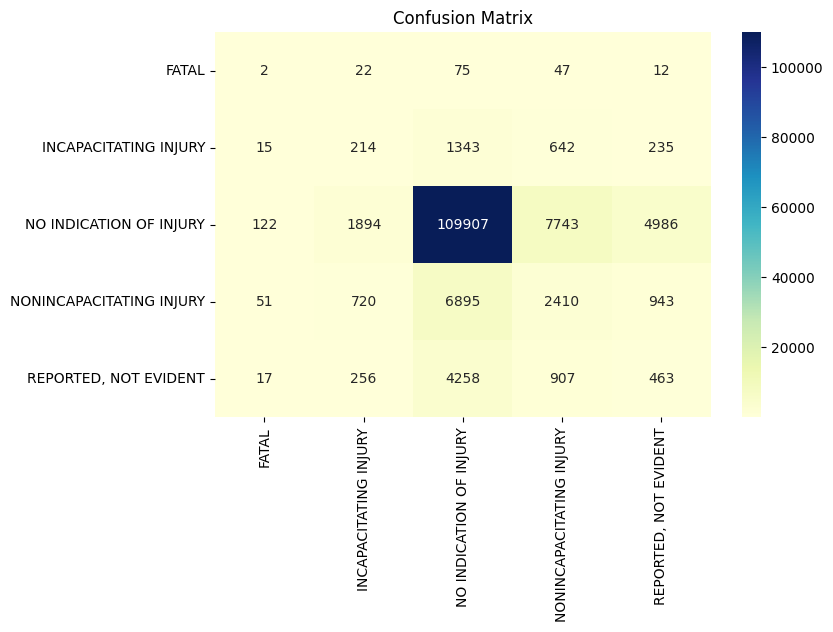

In [297]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
columns = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
# index
conf_matrix = pd.DataFrame(data=cm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

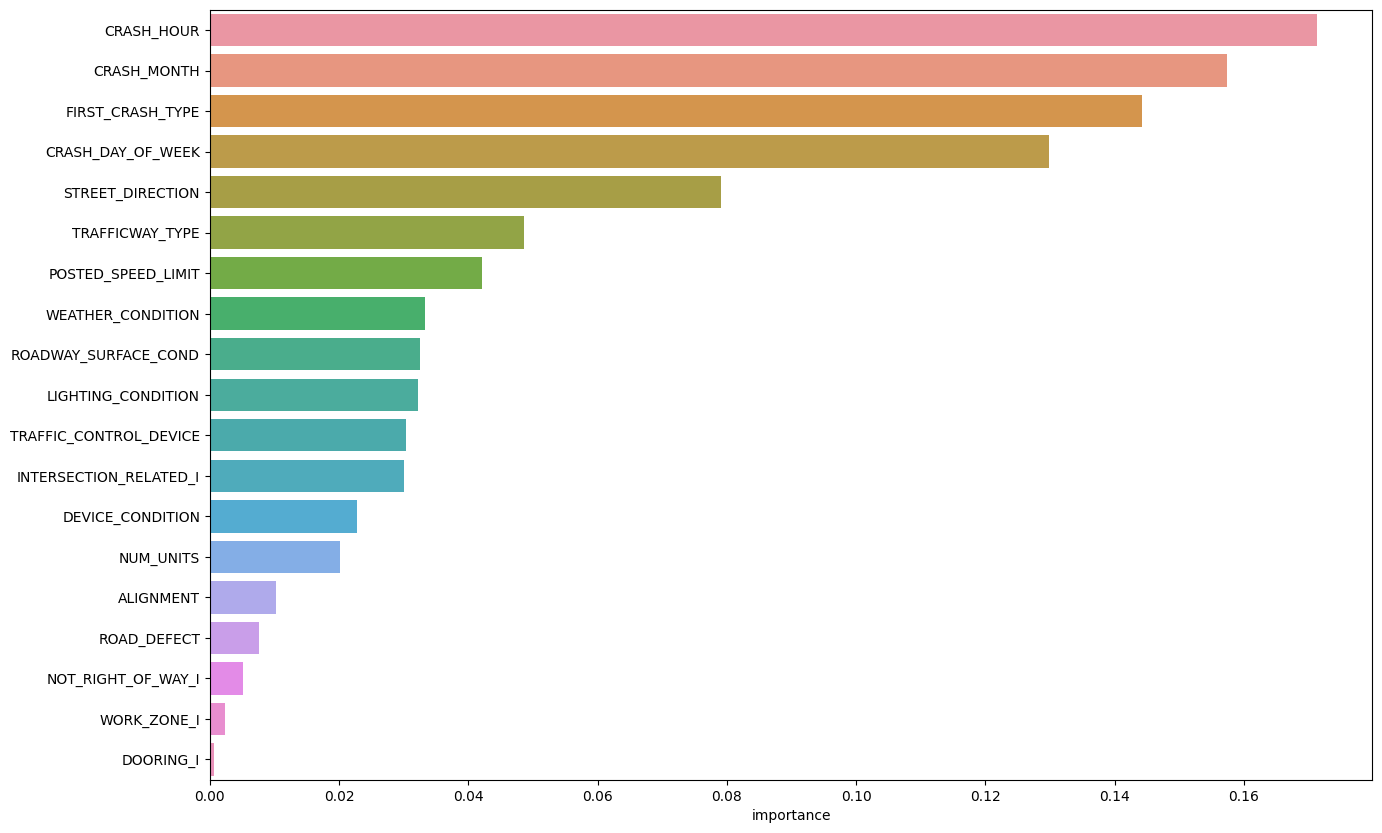

In [298]:
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_chicago.columns)

importances.iloc[:,0] = kernel.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

## Apply Random Forest

In [302]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
rfc_model = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
rfc_model.fit(x_train, y_train)

print("Best parameters scores:")
print(rfc_model.best_params_)
print("Train score:", rfc_model.score(x_train, y_train))
print("Validation score:", rfc_model.score(x_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
print("Default scores:")
rfc.fit(x_train, y_train)
print("Train score:", rfc.score(x_train, y_train))
print("Validation score:", rfc.score(x_test, y_test))

In [ ]:
pd.DataFrame(svc_model.cv_results_).sort_values(by="rank_test_score")

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
svc = svm.SVC(**svc_model.best_params_, random_state=42)
svc.fit(x_train, y_train)

print("Train score:", svc.score(x_train, y_train))
print("Validation score:", svc.score(x_test, y_test))

In [ ]:
y_pred = svc.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred, average="macro")}')
print(f'--------------------- TRAIN ---------------------')
print(classification_report(y_train, kernel.predict(x_train)))
print(f'--------------------- TEST ---------------------')
print(classification_report(y_test, y_pred))